In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [46]:
img = cv2.cvtColor(cv2.imread('pic.tif'), cv2.COLOR_BGR2GRAY)

In [47]:
#butterworth dft filter

def butterWorthFilter(img1, cutt_off, order):
    height, width = img.shape
    c1, c2 = height / 2, width / 2
    butterFilter = np.zeros((height, width), np.float64)
    for u in range(height):
        for v in range(width):
            D_uv = np.sqrt((u - c1)** 2 + (v-c2) ** 2)
            butterFilter[u, v] = 1 / (1 + (D_uv / cutt_off) ** (2 * order))
    filterd_image = img1 * butterFilter
    return filterd_image

In [48]:
# Gaussian filter image

def gaussian_filter(img, cutt_off):
    height, width = img.shape
    c1, c2 = height / 2, width / 2
    gaussianFilter = np.zeros((height, width), np.float64)

    for u in range(height):
        for v in range(width):
            D_uv = np.sqrt((u - c1) ** 2 + (v - c2) ** 2)
            gaussianFilter[u, v] = np.exp((-(D_uv ** 2)) / (2 * (cutt_off ** 2)))
    filterd_image = img * gaussianFilter
    return filterd_image

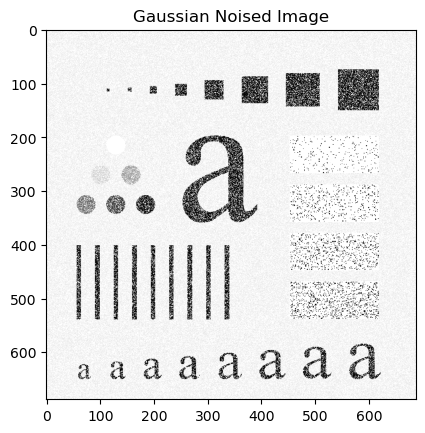

In [49]:
# Gaussian Noise Makeing
def gaussian_noise(img):
    mean = 7
    std_dev = 13
    gaussianNoise = np.random.normal(mean, std_dev, img.shape).astype(np.uint8)
    return cv2.add(img, gaussianNoise)
noise_image = gaussian_noise(img)

plt.title('Gaussian Noised Image')
plt.imshow(noise_image, cmap='gray')

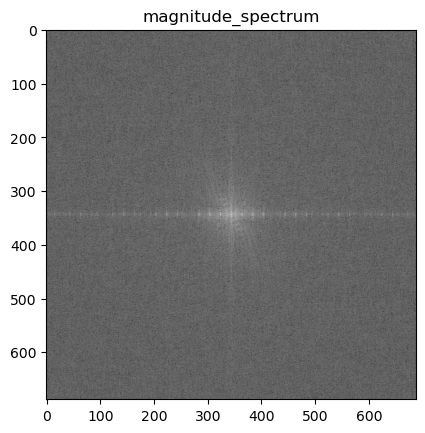

In [50]:
# fft of noise fileter

fft = np.fft.fft2(noise_image)
noisy_fft = np.fft.fftshift(fft)

magnitude_spectrum = np.log(np.abs(noisy_fft) + 1)

plt.title('magnitude_spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')


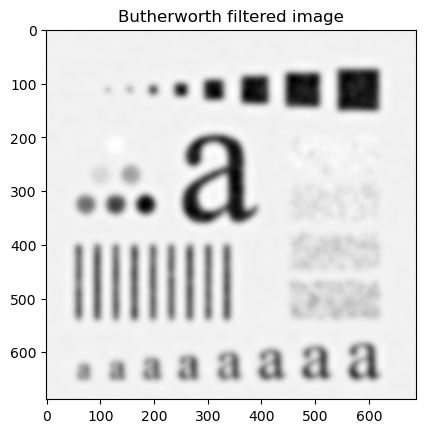

In [51]:
# remove butterworth noise 

filtered_image = butterWorthFilter(noisy_fft, 25, 2)

filtered_image = np.fft.ifftshift(filtered_image)
filtered_image = np.fft.ifft2(filtered_image)
filtered_image = np.abs(filtered_image)

plt.title('Butherworth filtered image')
plt.imshow(filtered_image, cmap='gray')

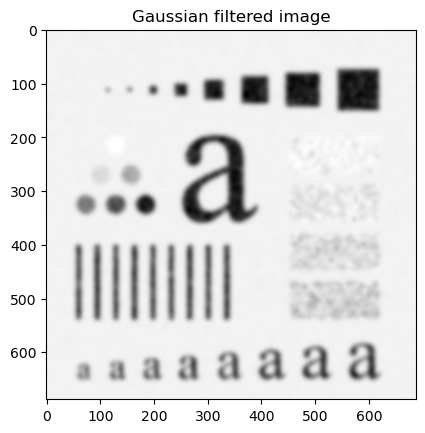

In [52]:
# Gaussian filterd image

filtered_image = gaussian_filter(noisy_fft, 25)

filtered_image = np.fft.ifftshift(filtered_image)
filtered_image = np.fft.ifft2(filtered_image)
filtered_image = np.abs(filtered_image)

plt.title('Gaussian filtered image')
plt.imshow(filtered_image, cmap='gray')

In [81]:
# idel high pass filter for edge detection

def high_pass_filter(image, cuttOff):

    fft = np.fft.fft2(image)
    fft = np.fft.fftshift(fft)


    height, width = fft.shape
    H_uv = np.zeros((height, width), np.float64)
    c1, c2 = height / 2, width / 2

    for u in range(height):
        for v in range(width):
            D_uv = np.sqrt((u - c1) ** 2 + (v - c2) ** 2)
            if D_uv >= cuttOff : 
                H_uv[u, v] = 1
    
    filtered_image = fft * H_uv

    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    filtered_image = np.abs(filtered_image)

    return filtered_image



In [84]:
# idel gaussian high pass filter for edge detection

def gaus_filter(image, cuttOff):

    fft = np.fft.fft2(image)
    fft = np.fft.fftshift(fft)


    height, width = fft.shape
    H_uv = np.zeros((height, width), np.float64)
    c1, c2 = height / 2, width / 2

    for u in range(height):
        for v in range(width):
            D_uv = np.sqrt((u - c1) ** 2 + (v - c2) ** 2)
            H_uv[u, v] = 1 - np.exp((-(D_uv ** 2)) / (2 * (cuttOff ** 2)))
    
    filtered_image = fft * H_uv

    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    filtered_image = np.abs(filtered_image)

    return filtered_image


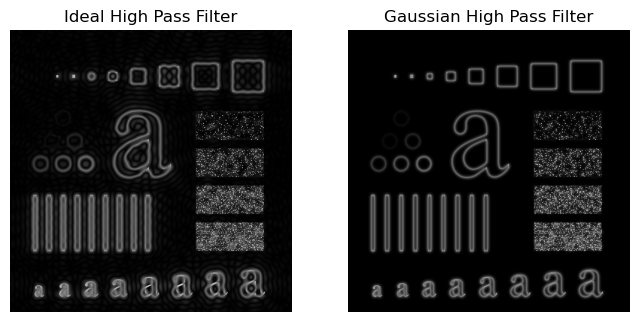

In [83]:
cuttOff = 30
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.title('Ideal High Pass Filter')
plt.axis('off')
plt.imshow(high_pass_filter(img, cuttOff), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Gaussian High Pass Filter')
plt.axis('off')
plt.imshow(gaus_filter(img, cuttOff), cmap='gray')